## Trabalho não remunerado e desigualdade de gênero: uma perspectiva global

As estatísticas de utilização do tempo são cruciais para medir a qualidade de vida e o bem-estar, abrangendo todas as formas de trabalho, inclusive o doméstico não remunerado. Além disso, são fundamentais para monitorar a igualdade de gênero, empoderamento das mulheres e contribuem para o diálogo político sobre essa questão.


Definição acordada internacionalmente


"O trabalho doméstico não remunerado refere-se a atividades que incluem a gestão e preparação de alimentos e refeições, limpeza e manutenção da própria habitação e arredores, decoração “faça você mesmo”, manutenção e reparação de bens pessoais e domésticos, cuidado e manutenção de têxteis e calçado, gestão doméstica, cuidados com animais de estimação, compras para a própria casa e familiares e viagens relacionadas a serviços domésticos não remunerados listados anteriormente.

O trabalho de cuidados não remunerado refere-se a atividades relacionadas com cuidados e instrução de crianças, cuidados a familiares e familiares doentes, idosos ou deficientes, ajuda a agregados familiares e familiares adultos não dependentes e viagens relacionadas com estes serviços de cuidados não remunerados"

https://gender-data-hub-2-undesa.hub.arcgis.com/pages/indicators#Theme1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("trabalho_nao_remunerado.csv", sep="," , encoding= 'UTF-8')

In [ ]:
df.dtypes

In [ ]:
df.info()

## Observações a partir de df.info(), que são relevantes à nossa análise:

- O DataFrame possui 2671 entradas (linhas) e 31 colunas;
- O índice é do tipo RangeIndex (sem a especificação de um índice personalizado) variando de 0 a 2670;
- Existem colunas com diferentes tipos de dados, incluindo float64, int64, e object;
- 'Non-Null Count' indica que todas as colunas têm 2671 valores não nulos, indicando que não há valores ausentes para essas colunas;
- Para as colunas numéricas (float64 e int64), podemos obter estatísticas descritivas como média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo;
- A contagem de valores não nulos em "is_latest_year", mostra que há 1635 valores não nulos nessa coluna, indicando que existem valores ausentes para algumas entradas.


Agora, vamos visualizar melhor essa questão dos nulos em 'is_latest_year':

In [ ]:
contagem_valores = df['is_latest_year'].value_counts(dropna=False)
print(contagem_valores)


A escolha de tratamento foi a seguinte:

In [ ]:
df['is_latest_year'].fillna('Sem Informação', inplace=True)  


Confirmando:

In [ ]:
contagem_valores = df['is_latest_year'].value_counts(dropna=False)
display(contagem_valores)


In [ ]:
display(df.columns)

In [ ]:
linhas, colunas = df.shape
print(f'O DataFrame tem {linhas} linhas e {colunas} colunas.')


In [ ]:
df.head(10)

## Observações a partir das primeiras linhas do dataframe, com df.head(10):

- Parece haver duplicatas nas primeiras linhas do DataFrame, pois algumas entradas são idênticas. Isso pode ser algo a ser investigado para garantir a consistência e integridade dos dados.

Colunas Relevantes:

- Algumas colunas parecem ser relevantes para a análise, como "indicator_label", "ref_area_desc", "iso3", "obs_value", "unit_measure_desc", "nature_desc", "reporting_type_desc", etc. Essas colunas podem conter informações importantes.

Coordenadas Geográficas:

- As colunas "x" e "y" parecem representar coordenadas geográficas (latitude e longitude). Essas informações podem ser úteis para visualizar ou analisar os dados geograficamente.

Valores Ausentes:

- As entradas 2 e 3 têm valores ausentes para a coluna "comment_obs", o que é indicado pelo "NaN". Isso pode ser um ponto de atenção, dependendo de como irá se desenvolver a análise.
 
Tipo de Dados:

- As colunas "time_period" e "is_latest_year" têm o tipo de dados int64 e float64, respectivamente. Isso pode ser relevante ao realizar operações específicas com essas colunas.

Natureza dos Dados:

- As colunas "nature_desc" e "reporting_type_desc" fornecem informações sobre a natureza dos dados e o tipo de relatório, respectivamente. Essas colunas podem ajudar a contextualizar os dados.

Dimensões:

- A coluna "dimensions" parece conter informações sobre as dimensões dos dados, como sexo, idade e urbanização. Essas dimensões podem ser fundamentais para segmentar e analisar os dados de maneira mais granular.

Unidade de Medida:

- A coluna "unit_measure_desc" fornece a unidade de medida dos dados, que pode ser crucial para interpretar as observações corretamente.

Vamos, então, verificar a suspeita por duplicatas:

In [ ]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print(f"Número de duplicatas: {num_duplicates}")

duplicate_rows = df[duplicates]
print(duplicate_rows)

Renomeando as colunas com método de dicionário:

In [ ]:
# Dicionário de mapeamento dos novos nomes das colunas
novo_nome_colunas = {
    'indicator_label': 'Rotulo do Indicador',
    'indicator_id': 'ID do Indicador',
    'indicator_desc': 'Descricao do Indicador',
    'minset_series': 'Serie Minima',
    'minset_series_desc': 'Descricao Serie Minima',
    'ref_area': 'Area de Referencia',
    'ref_area_desc': 'Descricao Area de Referencia',
    'iso3': 'Codigo ISO3',
    'x': 'Coordenada X',
    'y': 'Coordenada Y',
    'sdg_region': 'Regiao SDG',
    'time_period': 'Periodo de Tempo',
    'time_detail': 'Detalhe do Tempo',
    'sex': 'Genero',
    'sex_desc': 'Descricao do Genero',
    'age': 'Idade',
    'age_desc': 'Descricao Idade',
    'urbanization': 'Urbanizacao',
    'urbanization_desc': 'Descricao Urbanizacao',
    'obs_value': 'Valor Observado',
    'unit_measure': 'Unidade de Medida',
    'unit_measure_desc': 'Descricao Unidade de Medida',
    'nature': 'Natureza',
    'nature_desc': 'Descricao Natureza',
    'reporting_type': 'Tipo de Relatorio',
    'reporting_type_desc': 'Descricao Tipo de Relatorio',
    'comment_obs': 'Observacoes de Comentarios',
    'source_detail': 'Detalhes da Fonte',
    'source_year': 'Ano da Fonte',
    'dimensions': 'Dimensoes',
    'is_latest_year': 'E o Ano Mais Recente'
}

df.rename(columns=novo_nome_colunas, inplace=True)

# Verificar as colunas após a renomeação
display(df.columns)

Restringindo o dataframe somente com as colunas pertinentes à análise:

In [ ]:
from IPython.display import display

display(df.columns)

colunas_selecionadas = ['Descricao Area de Referencia', 'Regiao SDG', 'Periodo de Tempo',
                        'Descricao do Genero', 'Descricao Idade', 'Valor Observado',
                        'Descricao Unidade de Medida', 'Ano da Fonte', 'E o Ano Mais Recente']

if set(colunas_selecionadas).issubset(df.columns):
    novo_df = df[colunas_selecionadas]

    display(novo_df.head())



In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(novo_df.head())


Renomeando algumas colunas para facilitar a compreensão:

In [ ]:
novo_df = novo_df.rename(columns={'Descricao do Genero': 'Genero',
                                   'Descricao Idade': 'Idade',
                                   'E o Ano Mais Recente': 'Ano Mais Recente'})
display(pd.DataFrame(columns=novo_df.columns))

## Descrição das colunas que iremos explorar 

- Area de Referencia (Area de Referencia Description):

Descreve a área geográfica ou região específica relacionada aos dados. Exemplo: "Mongolia," "Chile," "Austria."

- Regiao SDG (SDG Region):

Indica a região associada aos Objetivos de Desenvolvimento Sustentável (SDG). Exemplo: "Eastern and South-Eastern Asia," "Latin America and the Caribbean," "Europe and Northern America."

- Periodo de Tempo (Time Period):

Refere-se ao ano em que os dados foram registrados. Exemplo: 2015, 2009.

- Genero (Gender Description):

Descreve o gênero relacionado aos dados. Exemplo: "Female," "Male."

- Idade (Age Description):

Descreve a faixa etária associada aos dados. Exemplo: "12 to 14 years old," "10 years old and over."

- Valor Observado (Observed Value):

Representa o valor específico observado para o indicador. Exemplo: 2.625 (Horas por dia), 4.398877 (Horas por dia).

- Descricao Unidade de Medida (Unit of Measure Description):

Descreve a unidade de medida associada ao valor observado. Exemplo: "Hours per day."

- Ano da Fonte (Source Year):

Indica o ano da fonte dos dados. Exemplo: 2022.

- Ano Mais Recente (Is Latest Year):

Indica se o ano é o mais recente para o indicador (valor binário). Exemplo: 1.0 (Sim, é o ano mais recente).

Salvando em um novo csv:

In [ ]:
novo_df.to_csv("novo_dataframe.csv", index=False)

## Com a conclusão da investigação e a implementação dos tratamentos, estamos prontos para iniciar nossa análise

In [ ]:
df = pd.read_csv("novo_dataframe.csv", sep=",", encoding='UTF-8')

In [ ]:
df.head(2)

## Média de horas de trabalho não remunerado por gênero no mundo:

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3889050265.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genero', y='Valor Observado', data=media_valor_por_genero, palette='viridis')


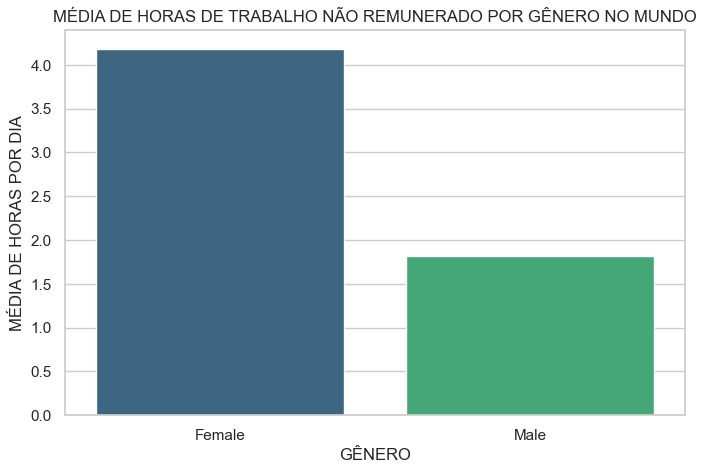

In [81]:
media_valor_por_genero = df.groupby('Genero')['Valor Observado'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Genero', y='Valor Observado', data=media_valor_por_genero, palette='viridis')
plt.title('MÉDIA DE HORAS DE TRABALHO NÃO REMUNERADO POR GÊNERO NO MUNDO')
plt.xlabel('GÊNERO')
plt.ylabel('MÉDIA DE HORAS POR DIA')
plt.show()


Há uma relevante disparidade de gênero no mundo, em relação aos trabalhos não remunerados (domésticos)

In [ ]:
valores_unicos = df['Regiao SDG'].unique()
valores_unicos


## Média de horas trabalhadas por gênero, por região:

Obs: os gráficos serão plotados em ordem de maior disparidade

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


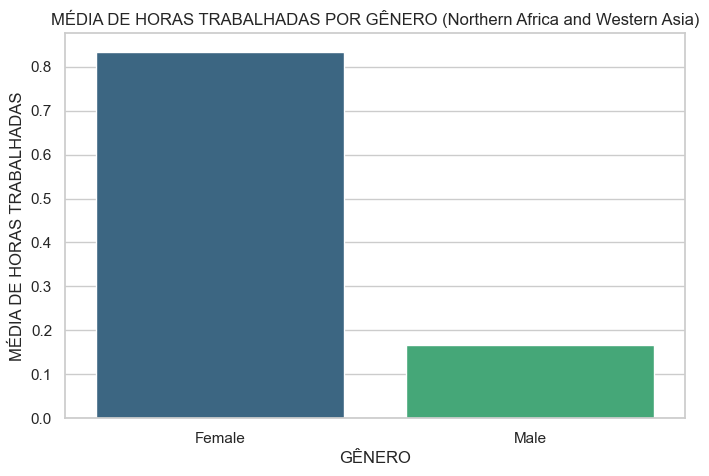

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


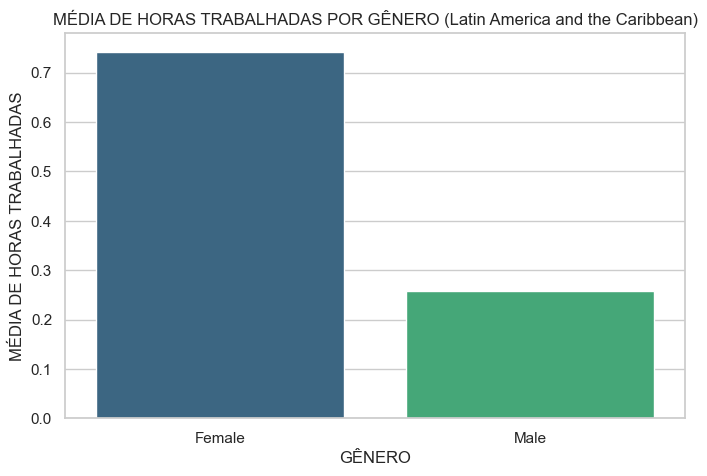

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


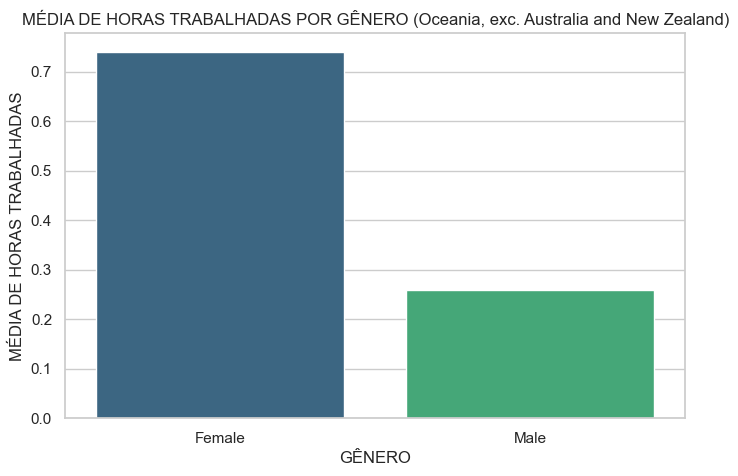

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


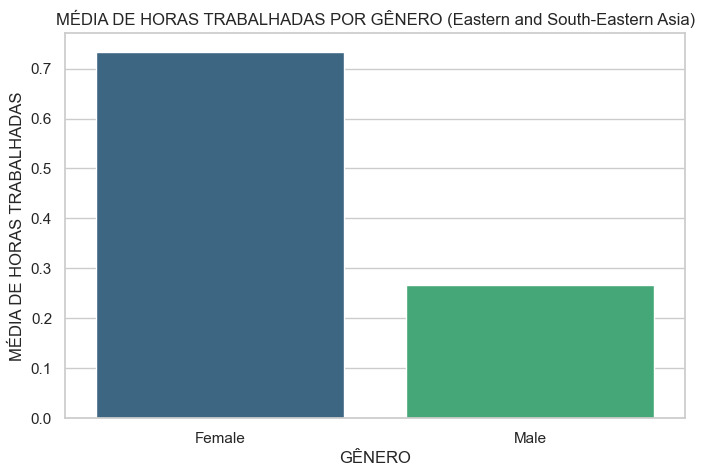

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


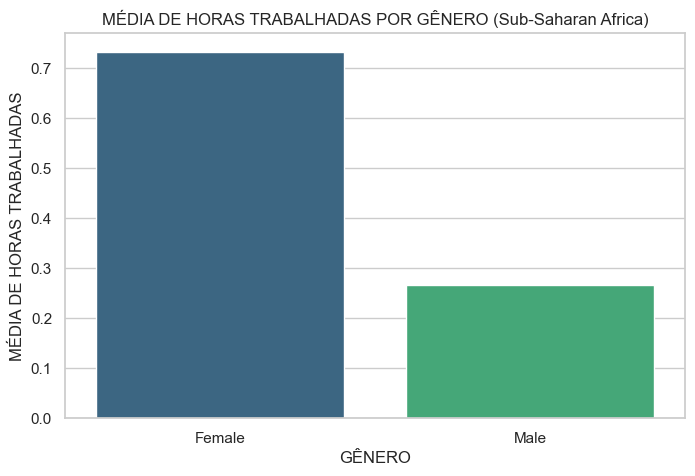

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


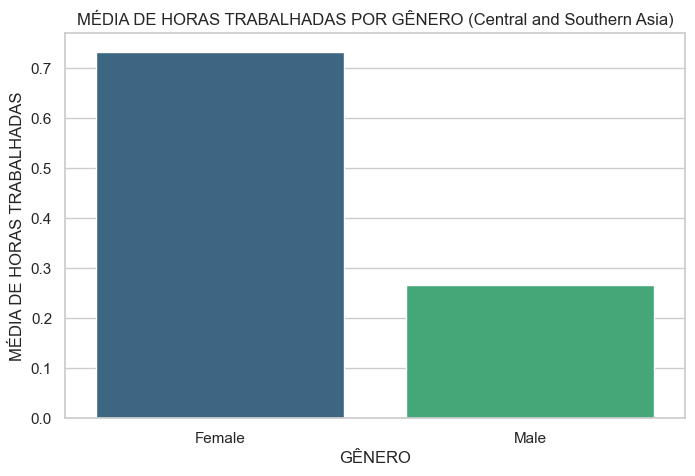

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


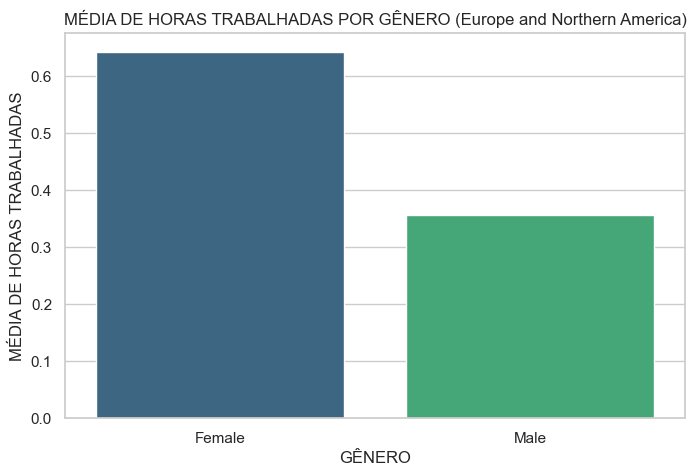

C:\Users\santi\AppData\Local\Temp\ipykernel_8168\3863117963.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


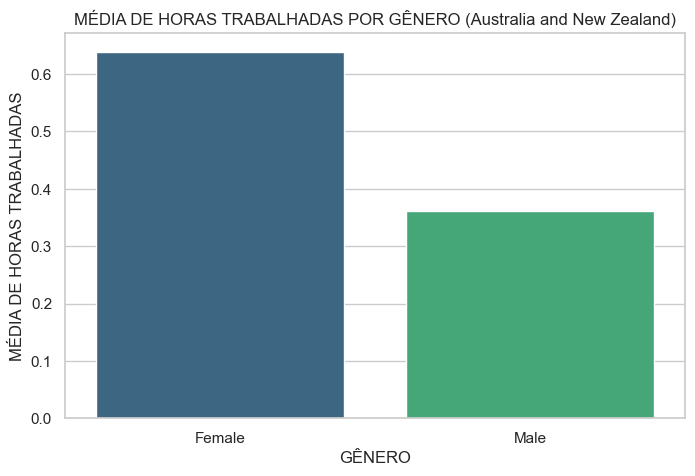

In [78]:
regioes = ['Eastern and South-Eastern Asia', 'Latin America and the Caribbean',
           'Europe and Northern America', 'Sub-Saharan Africa',
           'Northern Africa and Western Asia', 'Central and Southern Asia',
           'Australia and New Zealand', 'Oceania, exc. Australia and New Zealand']

proporcoes_regioes = []


cores = sns.color_palette('viridis')

for regiao in regioes:
    df_regiao = df[df['Regiao SDG'] == regiao]
    proporcao_horas = df_regiao.groupby('Genero')['Valor Observado'].sum() / df_regiao['Valor Observado'].sum()
    proporcoes_regioes.append((regiao, proporcao_horas))

proporcoes_regioes.sort(key=lambda x: x[1]['Female'], reverse=True)

for regiao, proporcao_horas in proporcoes_regioes:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')
    plt.title(f'MÉDIA DE HORAS TRABALHADAS POR GÊNERO ({regiao})')
    plt.xlabel('GÊNERO')
    plt.ylabel('MÉDIA DE HORAS TRABALHADAS')
    plt.show()


Maior disparidade entre gêneros, sendo em primeiro lugar a maior disparidade identificada:

Northern Africa and Western Asia em primeiro;

Latin America and the Caribbean em segundo;

Oceania, exc. Australia and New Zealand em terceiro;

Eastern and South-Eastern Asia em quarto;

Sub-Saharan Africa em quinto;

Central and Southern Asia em sexto;

Europe and Northern America em sétimo,

Australia and New Zealand em oitava posição e menor índice de disparidade


## Média de valores observados por região, para o gênero feminino

 O objetivo do próximo gráfico é apresentar a média dos valores observados para o trabalho não remunerado do gênero feminino em diferentes regiões. Ele busca fornecer uma visão comparativa das médias, permitindo identificar quais regiões têm uma média mais alta em termos de trabalho não remunerado para mulheres.

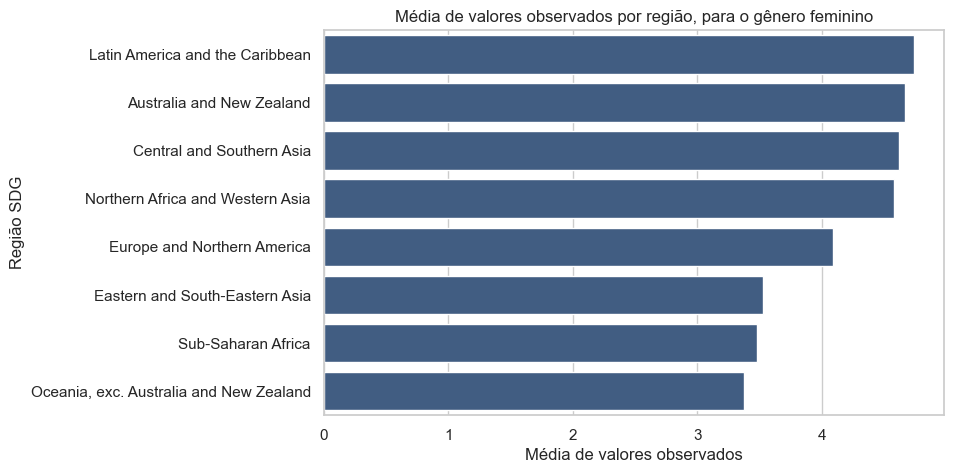

In [85]:
media_feminino_por_regiao = df[df['Genero'] == 'Female'].groupby('Regiao SDG')['Valor Observado'].mean()

media_feminino_por_regiao = media_feminino_por_regiao.sort_values(ascending=False)


plt.figure(figsize=(8, 5))

sns.barplot(x=media_feminino_por_regiao, y=media_feminino_por_regiao.index, color=sns.color_palette('viridis')[1])

plt.title('Média de valores observados por região, para o gênero feminino')
plt.xlabel('Média de valores observados')
plt.ylabel('Região SDG')

plt.show()




A região Latin America and the Caribbean apresenta a maior média de valores observados para o trabalho não remunerado do gênero feminino, indicando uma tendência de alta incidência nesse tipo de trabalho na região.


Australia and New Zealand, Central and Southern Asia e Northern Africa and Western Asia' ocupam as posições seguintes, com diferenças relativamente pequenas entre suas médias. Isso sugere que essas regiões estão próximas em termos de médias, indicando similaridades em relação ao trabalho não remunerado do gênero feminino.

Europe and Northern America, apesar de ocupar a quinta posição, mostra uma diferença moderada em relação às primeiras regiões. Isso indica que, embora esteja em uma posição intermediária, a disparidade em trabalho não remunerado do gênero feminino é menor do que em algumas outras regiões.

Eastern and South-Eastern Asia, apesar de estar em uma posição intermediária, já apresenta uma diferença mais considerável em relação às regiões superiores. Isso sugere uma variação mais significativa nessa parte do gráfico.


Sub-Saharan Africa e Oceania, exc. Australia and New Zealand, encontram-se nas últimas posições, indicando que essas regiões têm, em média, uma incidência menor de trabalho não remunerado do gênero feminino em comparação com as demais regiões.

##  Faixa etária com mais horas trabalhadas por dia, para o gênero feminino e em cada região

In [66]:

df_female = df[df['Genero'] == 'Female']

regioes = ['Eastern and South-Eastern Asia', 'Latin America and the Caribbean', 'Europe and Northern America',
           'Sub-Saharan Africa', 'Northern Africa and Western Asia', 'Central and Southern Asia',
           'Australia and New Zealand', 'Oceania, exc. Australia and New Zealand']

for regiao in regioes:
    df_regiao = df_female[df_female['Regiao SDG'] == regiao]

    if not df_regiao.empty:
        faixa_etaria_mais_alta = df_regiao.groupby('Idade')['Valor Observado'].mean().idxmax()

        df_faixa_etaria_mais_alta = df_regiao[df_regiao['Idade'] == faixa_etaria_mais_alta]

        media_horas_faixa_etaria_mais_alta = df_faixa_etaria_mais_alta['Valor Observado'].mean()

        print(f"Região: {regiao}, Faixa Etária com mais Trabalho: {faixa_etaria_mais_alta}, Média de Horas: {media_horas_faixa_etaria_mais_alta:.2f} horas por dia")



Região: Eastern and South-Eastern Asia, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 4.52 horas por dia
Região: Latin America and the Caribbean, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 6.20 horas por dia
Região: Europe and Northern America, Faixa Etária com mais Trabalho: 45 to 64 years old, Média de Horas: 5.29 horas por dia
Região: Sub-Saharan Africa, Faixa Etária com mais Trabalho: 15 to 49 years old, Média de Horas: 5.10 horas por dia
Região: Northern Africa and Western Asia, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 6.10 horas por dia
Região: Central and Southern Asia, Faixa Etária com mais Trabalho: 20 to 74 years old, Média de Horas: 6.42 horas por dia
Região: Australia and New Zealand, Faixa Etária com mais Trabalho: 15 years old and over, Média de Horas: 5.00 horas por dia
Região: Oceania, exc. Australia and New Zealand, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 4.63 ho

# Por ordem de menor idade na faixa etária com maior carga de trabalho e maior média de horas/dia se idade igual:

Região: Latin America and the Caribbean, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 6.20 horas por dia

Região: Eastern and South-Eastern Asia, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 4.52 horas por diaa

Região: Sub-Saharan Africa, Faixa Etária com mais Trabalho: 15 to 49 years old, Média de Horas: 5.10 horas por dia

Região: Australia and New Zealand, Faixa Etária com mais Trabalho: 15 years old and over, Média de Horas: 5.00 horas por dia

Região: Central and Southern Asia, Faixa Etária com mais Trabalho: 20 to 74 years old, Média de Horas: 6.42 horas por dia

Região: Northern Africa and Western Asia, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 6.10 horas por dia

Região: Oceania, exc. Australia and New Zealand, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 4.63 horas por dia

Região: Europe and Northern America, Faixa Etária com mais Trabalho: 45 to 64 years old, Média de Horas: 5.29 horas por dia

FAIXA ETÁRIA COM MAIS HORAS DE TRABALHO NÃO REMUNERADO PARA O GÊNERO FEMININO, EM CADA REGIÃO, NOS GRÁFICOS:


Região: Latin America and the Caribbean, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 6.20 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


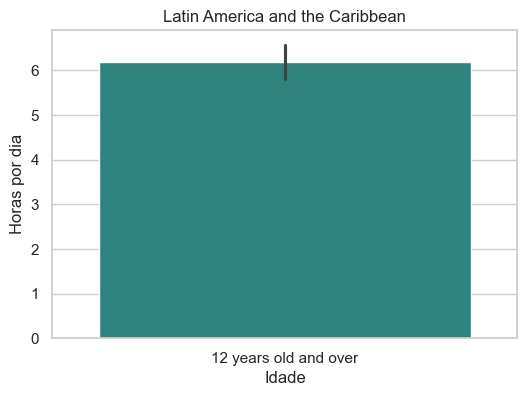

Região: Eastern and South-Eastern Asia, Faixa Etária com mais Trabalho: 12 years old and over, Média de Horas: 4.52 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


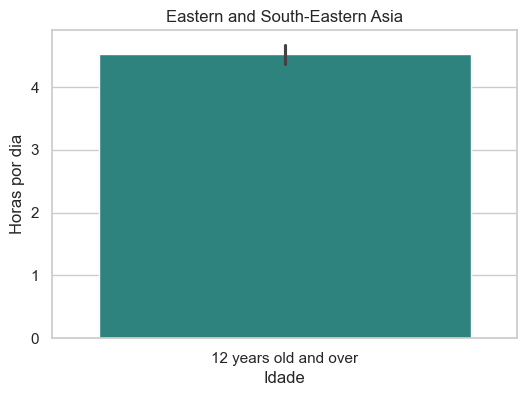

Região: Sub-Saharan Africa, Faixa Etária com mais Trabalho: 15 to 49 years old, Média de Horas: 5.10 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


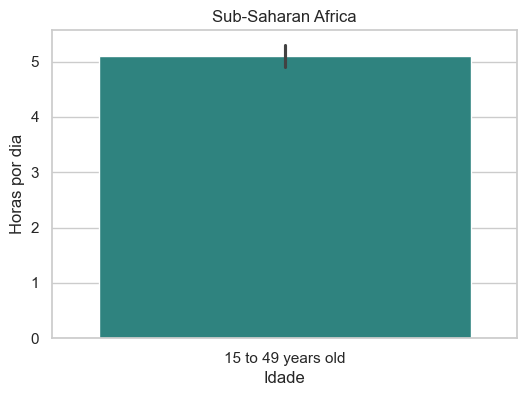

Região: Australia and New Zealand, Faixa Etária com mais Trabalho: 15 years old and over, Média de Horas: 5.00 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


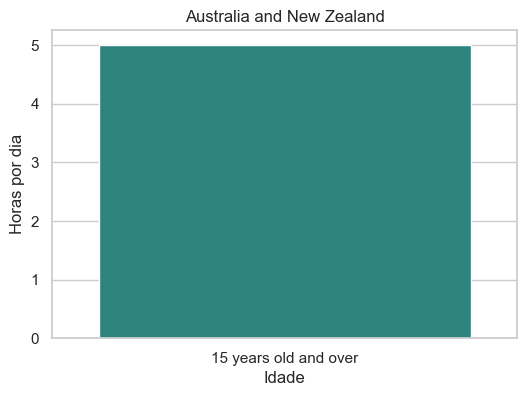

Região: Central and Southern Asia, Faixa Etária com mais Trabalho: 20 to 74 years old, Média de Horas: 6.42 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


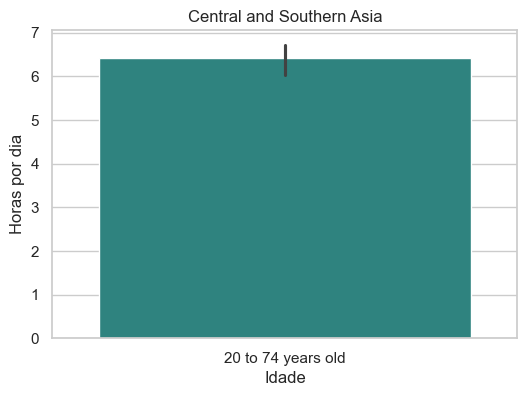

Região: Northern Africa and Western Asia, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 6.10 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


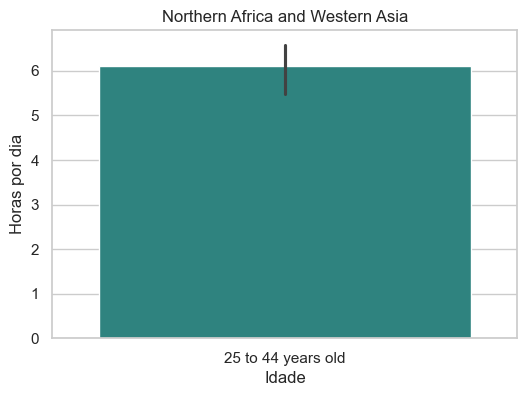

Região: Oceania, exc. Australia and New Zealand, Faixa Etária com mais Trabalho: 25 to 44 years old, Média de Horas: 4.63 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


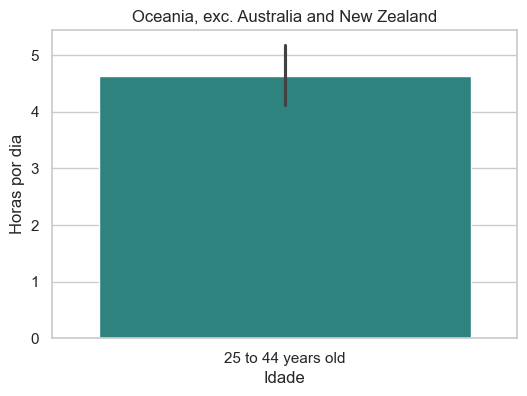

Região: Europe and Northern America, Faixa Etária com mais Trabalho: 45 to 64 years old, Média de Horas: 5.29 horas por dia


C:\Users\santi\AppData\Local\Temp\ipykernel_8168\1615092915.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')


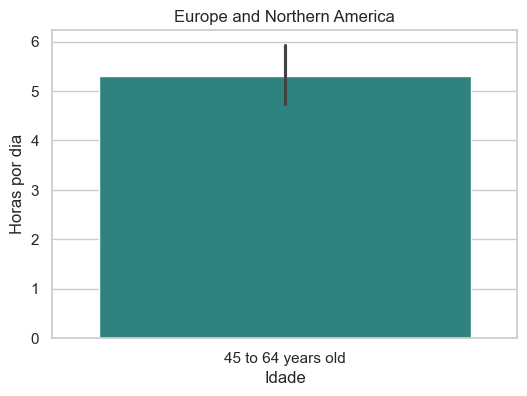

In [75]:
df_female = df[df['Genero'] == 'Female']

regioes = [
    ('Latin America and the Caribbean', '12 years old and over'),
    ('Eastern and South-Eastern Asia', '12 years old and over'),
    ('Sub-Saharan Africa', '15 to 49 years old'),
    ('Australia and New Zealand', '15 years old and over'),
    ('Central and Southern Asia', '20 to 74 years old'),
    ('Northern Africa and Western Asia', '25 to 44 years old'),
    ('Oceania, exc. Australia and New Zealand', '25 to 44 years old'),
    ('Europe and Northern America', '45 to 64 years old')
]

for regiao, faixa_etaria in regioes:
    df_regiao = df_female[(df_female['Regiao SDG'] == regiao) & (df_female['Idade'] == faixa_etaria)]

    if not df_regiao.empty:
        media_horas_faixa_etaria = df_regiao['Valor Observado'].mean()

        print(f"Região: {regiao}, Faixa Etária com mais Trabalho: {faixa_etaria}, Média de Horas: {media_horas_faixa_etaria:.2f} horas por dia")

        plt.figure(figsize=(6, 4))
        sns.barplot(x='Idade', y='Valor Observado', data=df_regiao, palette='viridis')
        plt.title(f'{regiao}') 
        plt.xlabel('Idade')
        plt.ylabel('Horas por dia')
        plt.show()


## Média de horas diárias em trabalho não remunerado (doméstico), em relação ao gênero feminino, por região:

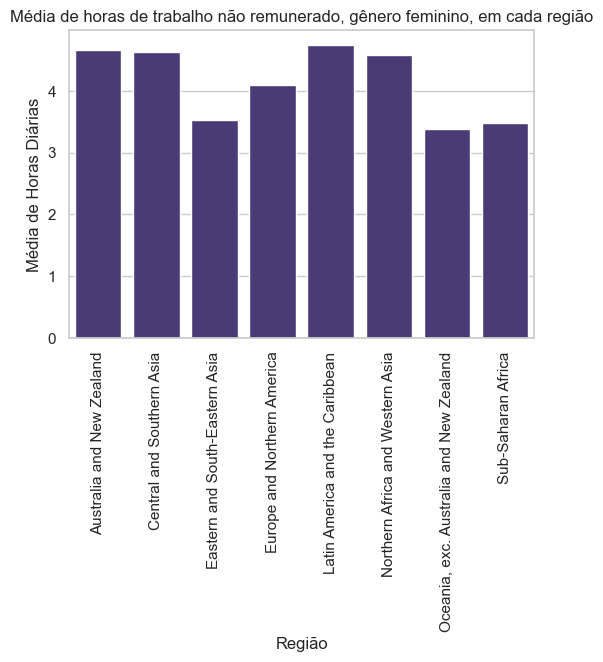

In [76]:
df_female = df[df['Genero'] == 'Female']
media_horas_por_regiao_female = df_female.groupby('Regiao SDG')['Valor Observado'].mean()

sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(6, 4))
sns.barplot(x=media_horas_por_regiao_female.index, y=media_horas_por_regiao_female)

plt.title('Média de horas de trabalho não remunerado, gênero feminino, em cada região')
plt.xlabel('Região')
plt.ylabel('Média de Horas Diárias')
plt.xticks(rotation=90)

plt.show()



In [84]:
df_female = df[df['Genero'] == 'Female']
media_horas_por_regiao_female = df_female.groupby('Regiao SDG')['Valor Observado'].mean()

print(media_horas_por_regiao_female)

Regiao SDG
Australia and New Zealand                  4.666667
Central and Southern Asia                  4.623333
Eastern and South-Eastern Asia             3.529035
Europe and Northern America                4.091966
Latin America and the Caribbean            4.745899
Northern Africa and Western Asia           4.582304
Oceania, exc. Australia and New Zealand    3.375776
Sub-Saharan Africa                         3.480422
Name: Valor Observado, dtype: float64


## Média de horas diárias em trabalho não remunerado (doméstico), em relação ao gênero masculino, por região:

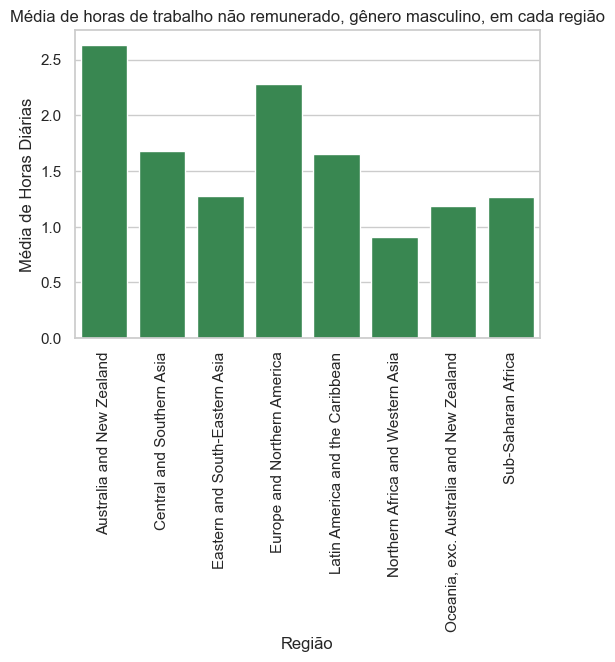

In [77]:
df_male = df[df['Genero'] == 'Male']
media_horas_por_regiao_male = df_male.groupby('Regiao SDG')['Valor Observado'].mean()

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(6, 4))
sns.barplot(x=media_horas_por_regiao_male.index, y=media_horas_por_regiao_male, color=sns.color_palette('Greens')[4])

plt.title('Média de horas de trabalho não remunerado, gênero masculino, em cada região')
plt.xlabel('Região')
plt.ylabel('Média de Horas Diárias')
plt.xticks(rotation=90)

plt.show()

In [83]:
df_male = df[df['Genero'] == 'Male']
media_horas_por_regiao_male = df_male.groupby('Regiao SDG')['Valor Observado'].mean()

print(media_horas_por_regiao_male)

Regiao SDG
Australia and New Zealand                  2.633333
Central and Southern Asia                  1.682857
Eastern and South-Eastern Asia             1.278721
Europe and Northern America                2.281029
Latin America and the Caribbean            1.648943
Northern Africa and Western Asia           0.909219
Oceania, exc. Australia and New Zealand    1.181778
Sub-Saharan Africa                         1.266400
Name: Valor Observado, dtype: float64


Com base nos insights da análise, conclui-se que existe uma notável disparidade de gênero no que diz respeito aos trabalhos não remunerados (atividades domésticas), em diversas regiões do mundo. As regiões de Northern Africa and Western Asia, Latin America and the Caribbean, e Oceania, exc. Australia and New Zealand, destacam-se como aquelas com as maiores disparidades entre os gêneros, enquanto Australia and New Zealand apresenta o menor índice de disparidade.

Ao analisar a média de valores observados para o gênero feminino, Latin America and the Caribbean se destaca como a região com a maior média, indicando uma alta incidência de trabalho não remunerado nesse grupo. As regiões de Australia and New Zealand, Central and Southern Asia, e Northern Africa and Western Asia, seguem-se com médias próximas, sugerindo similaridades nessas áreas.

Europe and Northern America, embora ocupe uma posição intermediária, apresenta uma disparidade menor em relação a algumas regiões, indicando uma menor diferença de trabalho não remunerado do gênero feminino em comparação com outras partes do mundo.

Eastern and South-Eastern Asia, embora esteja em uma posição intermediária, revela uma variação mais significativa em comparação com as regiões superiores, sugerindo uma diversidade de situações nessa parte do gráfico.

Sub-Saharan Africa e Oceania, exc. Australia and New Zealand, encontram-se nas últimas posições, indicando que essas regiões têm, em média, uma incidência menor de trabalho não remunerado do gênero feminino em comparação com outras partes do mundo.

Ao analisar as faixas etárias com mais horas trabalhadas por dia para o gênero feminino em cada região, observamos variações significativas, destacando a diversidade de situações em diferentes partes do mundo.

As médias de horas diárias de trabalho não remunerado, por gênero, em cada região, mostram que, em geral, as mulheres dedicam mais horas a essas atividades do que os homens. A disparidade entre os gêneros é mais acentuada em algumas regiões, como Northern Africa and Western Asia, e menos pronunciada em outras, como Sub-Saharan Africa.

Esses resultados enfatizam a importância de abordar as desigualdades de gênero e promover condições mais equitativas no que diz respeito ao trabalho não remunerado.

# Iniciativas visando descontruir estereótipos de gênero ao influenciar a cultura das sociedades

O setor privado pode colaborar criando produtos que atuem na cultura da sociedade, quebrando estereótipos de gênero, por exemplo:

Criando jogos que incorporem narrativas que desafiem estereótipos de gênero, mostrando personagens femininas e masculinas envolvidos em uma variedade de atividades, profissões e papéis familiares;

Organizando hackatons e workshops de tecnologia exclusivos para meninas, proporcionando um ambiente inclusivo e encorajador;

Organizando eventos com palestrantes femininas inspiradoras que compartilhem suas histórias de sucesso nas áreas STEM em profissões tidas como masculinas,

A indústria audiovisual garantir a representação diversificada de personagens em termos de gênero, etnia, habilidades, etc.
Trabalhar em parceria com organizações não-governamentais (ONGs) especializadas em igualdade de gênero para garantir que a mensagem seja autêntica e baseada em boas práticas.
Envolvendo consultores especializados em questões de gênero para garantir que os produtos desenvolvidos estejam alinhados com as melhores práticas e não reproduzam estereótipos.

O setor público poderia organizar eventos e conferências que destaquem as melhores práticas e cases de sucesso do setor privado na promoção da igualdade de gênero;

Incentivar empresas a colaborarem com organizações não-governamentais especializadas em igualdade de gênero, proporcionando apoio financeiro e estrutural para iniciativas conjuntas;

Instituir programas de reconhecimento e certificações para empresas que demonstrarem compromisso efetivo com a promoção da igualdade de gênero em seus produtos e práticas;

Criar incentivos fiscais para empresas que desenvolvam e promovam produtos, como jogos, workshops e eventos, que contribuam para a desconstrução de estereótipos de gênero;

Promover campanhas sociais que desconstroem estereótipos de gênero, desafiando a ideia tradicional de que o trabalho doméstico é responsabilidade exclusiva das mulheres,

Fomentar programas de engajamento comunitário que incentivem a participação de homens em tarefas domésticas e destaquem os benefícios de uma abordagem mais equitativa.

Campanhas nas escolas que envolvam toda a família em conversas sobre como homens e mulheres podem realizar todas as tarefas e profissões, desafiando estereótipos que limitam certas atividades a um gênero específico. Conversas abertas sobre as expectativas em relação às tarefas domésticas, explicando que todos os membros da família contribuem para manter um lar funcional.